<div class="alert alert-block alert-success"><h3>IFN619 - Data Analytics for Strategic Decision Makers</h4></div>

## Introduction :: Asking the right questions

1. Introductions
2. Unit Structure and Assessment
3. Communication and Slack
**4. Data Analytics Cycle**
**5. Getting started with Jupyter**
**6. Some Exercises to Consolidate Your Knowledge**
**7. Asking the right questions**


### [4] Data Analytics Cycle

In our approach to data analytics, we will follow a process that requires that we address 5 questions:
1. Which is the right question?
2. Which is the right data?
3. Which is the right analysis?
4. Which is the right visualisation?
5. Which is the right insight?

For this unit, we are concerned with more than just data analytics, we are interested in what is *appropriate, efficous, ethical ...* what is ***right!***

#### 1. A starting question

Students choose to study for many different reasons. Usually, these reasons are associated with both (a) their history and (b) their imagined future. 

*Which questions might give us insight into students of IFN619 and their reasons for studying?* 

- **One example:** ***Which fields are IFN619 students most interested in?***

**DISCUSSION:** What are some other possible questions?

#### 2. Some relevant data

In [79]:
# importa Python libraries
import pandas as pd               # used for tabular datasets
import matplotlib.pyplot as plt   # used for visualisation purposes

In [54]:
# read our data into a dataframe variable (df)
data = pd.read_csv('data/ifn619_2020.csv') 


In [55]:
# what is this data about?
# let's check if there is any information in the columns

for heading in data.columns:   # for each heading in the dataframe
    print(heading)           # print the heading

student_id
course_code
major_code


In [56]:
# let's take a quick look at our data
N = 10          # number of rows to display
data.head(N)    # print the first N rows

,student_id,course_code,major_code
0,1,IN27,
1,2,IN23,
2,3,IN20,IN20MJR-DATASC
3,4,IN26,
4,5,IN20,IN20MJR-DATASC
5,6,IN21,IN20MJR-SECUR
6,7,IN20,IN20MJR-BUSPMGT
7,8,IN20,IN20MJR-COMPSC
8,9,IN20,IN20MJR-DATASC
9,10,IN26,


**DISCUSSION:** How relevant is the data, what are some potential issues?

#### 3. Analysing the data

We can explore the data, asking questions like *how many students are there?*

In [57]:
# How many students are in this dataset?
# We can answer this questions by determining the total number of 
# instances (rows) in our dataset

# The dimensional shape of the dataframe
data.shape

(218, 3)

In [58]:
#We only want the number of rows
data.shape[0]

218

In [59]:
print("There are {} students represented in the data".format(df.shape[0]))

There are 218 students represented in the data


**DISCUSSION:** Why might this question be important?

How can we address our original question: Which fields are IFN619 students most interested in?

Perhaps, the course code?

In [60]:
# Select column "course_code" from our dataset\

data.course_code

0      IN27
1      IN23
2      IN20
3      IN26
4      IN20
       ... 
213    IN23
214    IN27
215    IN20
216    IN20
217    IN20
Name: course_code, Length: 218, dtype: object

In [61]:
# we can remove all repeated elements of the columns by 
# calling the unique() method

data.course_code.unique()

array(['IN27', 'IN23', 'IN20', 'IN26', 'IN21', 'U083'], dtype=object)

But perhaps what is more useful is to know how many students are from each course...

In [64]:
course_counts = data.groupby('course_code')['student_id'].count()
course_counts

course_code
IN20    90
IN21    12
IN23    14
IN26    19
IN27    82
U083     1
Name: student_id, dtype: int64

What about the major code?

In [66]:
data.major_code.unique()

array([' ', 'IN20MJR-DATASC', 'IN20MJR-SECUR', 'IN20MJR-BUSPMGT',
       'IN20MJR-COMPSC', 'IN20MJR-ENTSYS', 'IN20MJR-INFOMGT',
       'IN20MJR-BUSANAL'], dtype=object)

In [69]:
major_counts = data.groupby('major_code')['student_id'].count()
major_counts

major_code
                   117
IN20MJR-BUSANAL      1
IN20MJR-BUSPMGT     15
IN20MJR-COMPSC      15
IN20MJR-DATASC      59
IN20MJR-ENTSYS       4
IN20MJR-INFOMGT      6
IN20MJR-SECUR        1
Name: student_id, dtype: int64

**DISCUSSION:** What is the problem with our analysis?

#### 4. Visualising the results

Visualising our results can help us see features that are difficult to see in raw numbers. Visualisation can also help others understand our results.

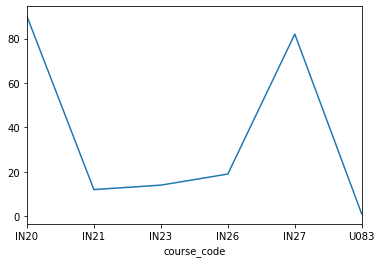

In [77]:

course_counts.plot(kind="line")
plt.show()

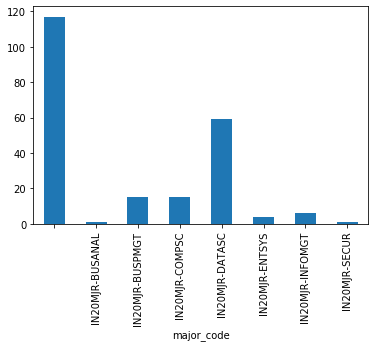

In [78]:
major_counts.plot(kind="bar")
plt.show()

**DISCUSSION:** What are the problem with these visualisations? How can these problems be fixed?

In [80]:
new_data = data[data['major_code'].str.contains('\S', regex=True)]
new_data

,student_id,course_code,major_code
2,3,IN20,IN20MJR-DATASC
4,5,IN20,IN20MJR-DATASC
5,6,IN21,IN20MJR-SECUR
6,7,IN20,IN20MJR-BUSPMGT
7,8,IN20,IN20MJR-COMPSC
...,...,...,...
211,212,IN20,IN20MJR-DATASC
212,213,IN21,IN20MJR-DATASC
215,216,IN20,IN20MJR-BUSANAL
216,217,IN20,IN20MJR-DATASC


In [93]:
only_major_counts = new_data.groupby('major_code')['student_id'].count()
only_major_counts


major_code
IN20MJR-BUSANAL     1
IN20MJR-BUSPMGT    15
IN20MJR-COMPSC     15
IN20MJR-DATASC     59
IN20MJR-ENTSYS      4
IN20MJR-INFOMGT     6
IN20MJR-SECUR       1
Name: student_id, dtype: int64

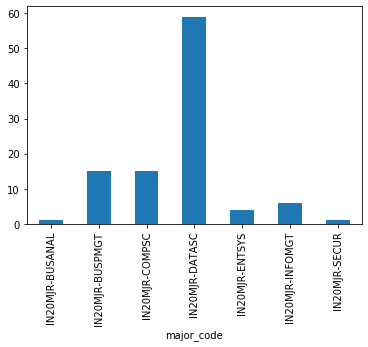

In [105]:
only_major_counts.plot(kind="bar")
plt.show()

Maybe we can add different colors to the different majors

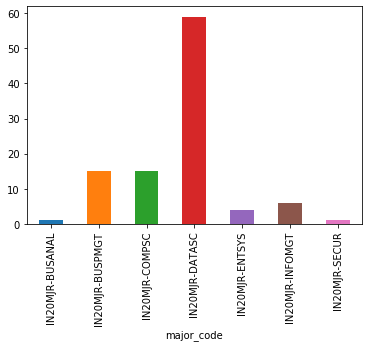

In [107]:
# we have 7 different majors, so we can. use the system's colors from the default color map
colors = tuple(["C0", "C1","C2","C3","C4","C5", "C6"])

only_major_counts.plot(kind="bar", color=colors)
plt.show()

#### 5. Insight

To actually make our analytics insightful, we need to present it in a way that makes the analysis meaningful to people.

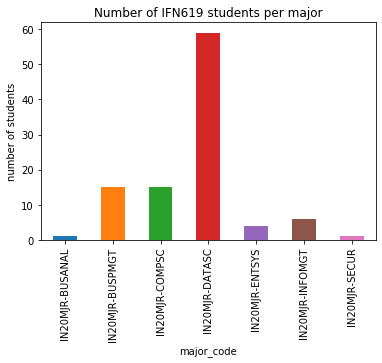

In [109]:
chartTitle="Number of IFN619 students per major"
yaxisLabel="number of students"
xaxisLabel="major"

only_major_counts.plot.bar(color=colors, ax=plt.axes(title=chartTitle,ylabel = yaxisLabel ,
                                                     xlabel = xaxisLabel) )
plt.show()

**DISCUSSION:** Is this sufficient for insight? What else is needed for insight?

In [84]:
studs_with_major = only_major_counts.sum()
total_studs = data.shape[0]
ratio = studs_with_major/total_studs
sent = "Only {} of a total {} students have a major. This represents only {:.2%} of the population."
print(sent.format(studs_with_major,total_studs,ratio))

Only 101 of a total 218 students have a major. This represents only 46.33% of the population.


**DISCUSSION:** 
- Is this enough?
- What can we say about the original question?
- Think back to the issues raised in the discussion - How do they compound over the course of the analytics?
- What is the end result for the insight?

### [5] Getting started with Jupyter
- Create a GitHub account (if you don't have one)
- Login to Jupyter - [http://jupyter.infosci-apps.qut.edu.au](http://jupyter.infosci-apps.qut.edu.au)
- Click the link in Blackboard to sync the workshop materials to your Jupyter accounts

Notebooks have 2 main types of cells - `Markdown` cells for displaying content like a web page, and `Code` cells for running code (in our case Python code) and displaying the results. In this practical session we will explore both of these types of cells and how they work together for a complete analytics process.

Before moving on to the tasks, familiarise yourself with the menus above, and in particular the keyboard short cuts (click the keyboard icon) for `run cell and insert below`, `run cell and select next`, changing between `command` and `edit` modes, and changing between `Code` and `Markdown` cell types.

---

### [6] Some Exercises to Consolidate Your Knowledge

You are part of a data analytics company that evaluates data from sport competitions. Your boss needs to get some information about the olympic games and wants you to answer the following questions:

-> answer each question with the appropriate visualisations and insights

-> (dataset file can be found in *data/olympics.csv*)

#### **Question 1:** 
Which are the best performing countries in the olympics (most medals won in summer games, winter games, or both)?


In [111]:
# dataset to be used throughout this exercise
dataset_path = "data/olympics.csv"

# YOUR ANALYSIS HERE

#### **Question 2:**
Which country had the biggest difference between their summer and winter gold medal counts?

In [112]:
# YOUR ANALYSIS HERE


#### **Question 3:**
Make an exploratory analysis of the entire dataset, find a relevant business concern that would provide new insights about the performance of each country, and provide an answer to it.

-> there is no right / wrong answer here. Your creatility and ability to find a relevant business concern are the most important things here

In [113]:
# YOUR ANALYSIS HERE


### [7] Asking the right questions

- Not just about the analytics, more about asking the right questions
- Try the business analytics excercise at home

### [8] What's next
- Studios - help with getting started in Jupyter
- Tutorials - work on a basic task to help you get oriented to the technologies
- Assessment - Assignments 1 & 3 will be introduced next week